In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

Looking in indexes: https://download.pytorch.org/whl/cu118
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 GB 3.4 MB/s eta 0:14:26
   ---------------------------------------- 0.0/2.9 GB 6.1 MB/s eta 0:07:57
   ---------------------------------------- 0.0/2.9 GB 6.1 MB/s eta 0:07:57
   ---------------------------------------- 0.0/2.9 GB 6.0 MB/s eta 0:08:03
   ---------------------------------------- 0.0/2.9 GB 7.8 MB/s eta 0:06:14
   ---------------------------------------- 0.0/2.9 GB 8.3 MB/s eta 0:05:50
   ---------------------------------------- 0.0/2.9 GB 8.1 MB/s eta 0:05:57
   ---------------------------------------- 0.0/2.9 GB 8.9 MB/s eta 0:05:27
   ---------------------------------------- 0.0/2.9 GB 9.1 MB/s eta 0:05:18
   ---------------------------------------- 0.0/2.9 GB 9.1 MB/s eta 0:05:16
   ----------------------------------------

In [7]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [69]:
IMAGE_PATH = 'sign.png'

In [73]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256601171587),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9719649866726915),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683972823468038)]

In [75]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

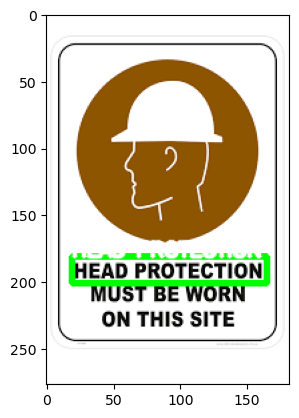

In [77]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [79]:
## 3. handiling multiple lines

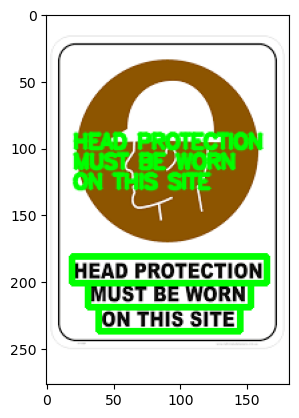

In [81]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()